<a href="https://colab.research.google.com/github/EricSiq/Natural_Language_Processing/blob/main/TextClassigicationNLP_Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install emoji contractions -qq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.1/345.1 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 113.9/113.9 kB 10.3 MB/s eta 0:00:00


In [2]:
import nltk
import pandas as pd
import re
import string
import numpy as np
import emoji
import contractions
nltk.download('all')
from bs4 import BeautifulSoup
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

In [3]:
# Download and Transform Data

splits = {'train': 'data/train-00000-of-00001.parquet', 'test': 'data/test-00000-of-00001.parquet'}
df_train = pd.read_parquet("hf://datasets/wangrongsheng/ag_news/" + splits["train"])
df_test = pd.read_parquet("hf://datasets/wangrongsheng/ag_news/" + splits["test"])

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


<BarContainer object of 4 artists>

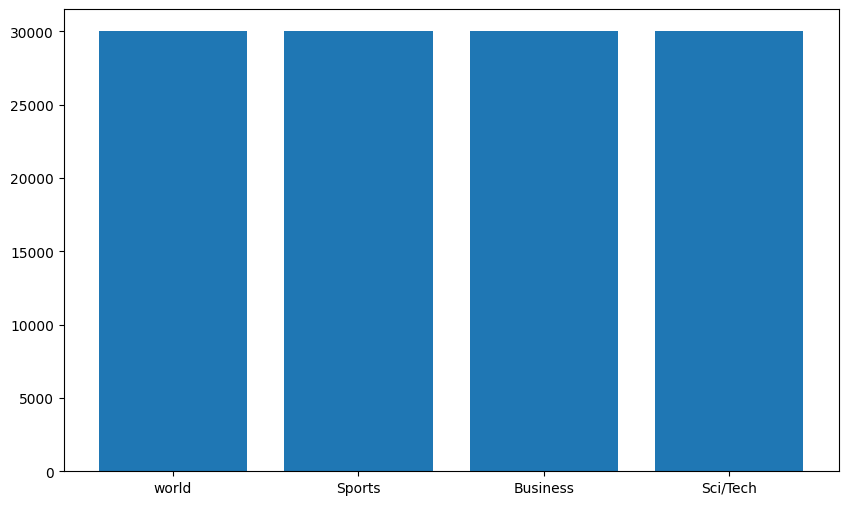

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.bar(['world','Sports','Business','Sci/Tech'],df_train['label'].value_counts().values)

In [5]:
def clean_text(text):
  text = text.translate(str.maketrans('', '', string.punctuation))  #remove puntuation
  text = text.lower() # lower cse
  text = re.sub(r'http\S+|www\S+|https\S+', '', text) #remove URLs
  text = contractions.fix(text) # fix I've, wouldh've, etc.
  text = BeautifulSoup(text, 'html.parser').get_text()  # remove HTML tags
  text = re.sub(r'\d+', '', text) #remove numbers
  text = ' '.join(text.split()) # remove extra white spaces
  # remove stopwords
  stopwrd = set(stopwords.words('english'))
  text = ' '.join([word for word in text.split() if word not in stopwrd])
  # replaceemojis with text
  text = emoji.demojize(text)
  return text

In [6]:
df_train['clean_text'] = df_train['text'].apply(clean_text)
df_test['clean_text'] = df_test['text'].apply(clean_text)

In [7]:
df_train.head()

,text,label,clean_text
0,Wall St. Bears Claw Back Into the Black (Reute...,2,wall st bears claw back black reuters reuters ...
1,Carlyle Looks Toward Commercial Aerospace (Reu...,2,carlyle looks toward commercial aerospace reut...
2,Oil and Economy Cloud Stocks' Outlook (Reuters...,2,oil economy cloud stocks outlook reuters reute...
3,Iraq Halts Oil Exports from Main Southern Pipe...,2,iraq halts oil exports main southern pipeline ...
4,"Oil prices soar to all-time record, posing new...",2,oil prices soar alltime record posing new mena...


In [8]:
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

In [9]:
X_train, y_train = df_train['clean_text'], df_train['label']
X_test, y_test = df_test['clean_text'], df_test['label']

In [10]:
# define a full pipelone with  a placeholder for vectorizer and classifier
pipeline = Pipeline([
    ('vectorizer', CountVectorizer()),  # placeholder, replaced in paragraph
    ('classifier', MultinomialNB()) # placeholder, replaced in paragraph
])

# define hyperparameter grid
param_grid = [
    {
        'vectorizer': [TfidfVectorizer()],
        'classifier': [RandomForestClassifier()],
        'vectorizer__ngram_range': [(1, 1)],
        'classifier__n_estimators': [100],
        'classifier__max_depth': [None, 10]
    },
]

In [11]:
# create GridSearchCV
grid = GridSearchCV(pipeline, param_grid, cv = 2, verbose = 3)

In [12]:
# fit the plane
grid.fit(X_train, y_train)

Fitting 2 folds for each of 2 candidates, totalling 4 fits
[CV 1/2] END classifier=RandomForestClassifier(), classifier__max_depth=None, classifier__n_estimators=100, vectorizer=TfidfVectorizer(), vectorizer__ngram_range=(1, 1);, score=0.861 total time= 3.2min
[CV 2/2] END classifier=RandomForestClassifier(), classifier__max_depth=None, classifier__n_estimators=100, vectorizer=TfidfVectorizer(), vectorizer__ngram_range=(1, 1);, score=0.866 total time= 3.3min
[CV 1/2] END classifier=RandomForestClassifier(), classifier__max_depth=10, classifier__n_estimators=100, vectorizer=TfidfVectorizer(), vectorizer__ngram_range=(1, 1);, score=0.801 total time=   4.5s
[CV 2/2] END classifier=RandomForestClassifier(), classifier__max_depth=10, classifier__n_estimators=100, vectorizer=TfidfVectorizer(), vectorizer__ngram_range=(1, 1);, score=0.806 total time=   4.4s


GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('vectorizer', CountVectorizer()),
                                       ('classifier', MultinomialNB())]),
             param_grid=[{'classifier': [RandomForestClassifier()],
                          'classifier__max_depth': [None, 10],
                          'classifier__n_estimators': [100],
                          'vectorizer': [TfidfVectorizer()],
                          'vectorizer__ngram_range': [(1, 1)]}],
             verbose=3)

In [13]:
!pip install transformers evaluate datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 3.9 MB/s eta 0:00:00


In [16]:
from transformers import transformers
from datasets import Dataset
import evaluate

ImportError: cannot import name 'transformers' from 'transformers' (/usr/local/lib/python3.11/dist-packages/transformers/__init__.py)

In [17]:
#make data
train_ds = Dataset.from_pandas(df_train[['clean_text','label']])
test_ds = Dataset.from_pandas(df_test[['clean_text','label']])
#load tokenizer and model

NameError: name 'Dataset' is not defined

In [18]:
tokenizer =BertTokenizerFast.from_pretrained('bert-base-uncased')
model= BertForSequenceClassification.from_pretrained("bert-base-uncased",num_labels=num_labels)

NameError: name 'BertTokenizerFast' is not defined

In [ ]:
def tokenize(batch):
  return toeknizer(batch['clean_text'],truncation=True,padding=True)
train_ds =train_ds.map(tokenize, batched=True)
test_ds =test_ds.map(tokenize, batched=True

In [ ]:
train_vaiid = train_ds.train_test_split(test_size=0.1,seed=42)
train_ds_split = train_valid['train']
eval_ds_split = train_valid['test']

In [ ]:
trainer=Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds_split,
    eval_dataset=eval_ds_split,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

In [ ]:
report=classification_report((test_ds['label'],y_pred, target_names))